<a href="https://colab.research.google.com/github/paulovbpo/deep_learning_keras/blob/master/Deep_Learning_Keras_Classifica%C3%A7%C3%A3o_Roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((x_treino, y_treino),(x_teste,y_teste)) = dataset.load_data()

# Exploração dos dados


In [0]:
len(x_treino)
len(x_teste)
x_treino.shape   #retorna a quantidade de elementos(imagens) da tupla, o numero de colunas, e o numero de linhas.
y_treino.min()
y_treino.max()

9

# Exibição dos dados

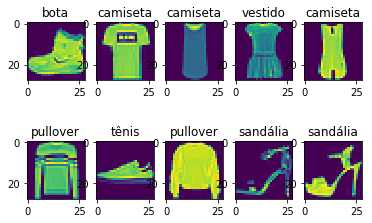

In [0]:
total_classificacoes = 10
nomes_classificacao = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(x_treino[imagem])
  plt.title(nomes_classificacao[y_treino[imagem]])

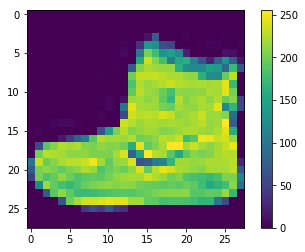

In [0]:
plt.imshow(x_treino[0])
plt.colorbar()   # mostra a gradação das cores de 0 a 255 pixels

# Normalização

In [0]:
x_treino = x_treino/float(255)  # em vez de passar 256 valores, passa valores decimais de 0 a 1

# Criando, Compilando e Treinando o modelo da RNA

In [0]:
# é usual contar o número de camadas sem levar em conta a de entrada, logo esse modelo teria 3 camadas apenas.
# ao tentar aumentar o numero de camadas ocultas aumentou o numero de perda(loss)
modelo = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # camada de entrada que achata os 28x28 pixels das imagens em uma array de 784 pixels
                          keras.layers.Dense(256, activation = tensorflow.nn.relu),  # 1° camada oculta com 256 neurônios, passando uma função de ativação ReLU (uma função não linear)
                          keras.layers.Dropout(0.2), # 2° camada oculta, deixa 'adormecido' uma porcentagem de neurônios da camada oculta, serve para normalizar
                          keras.layers.Dense(10, activation = tensorflow.nn.softmax) # camada de saída, com 10 neurônios que é equivalente ao total de classificações, e softmax como função de ativação
])

# compilando
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy']) # define os algoritmos do otimizador, do calculo do erro (perda), e da metrica de acerto.

# treinando 
historico = modelo.fit(x_treino, y_treino, epochs = 5, validation_split = 0.2) # treina, define o numero de épocas, e separa 20% para validação

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 96us/sample - loss: 0.5301 - acc: 0.8126 - val_loss: 0.4216 - val_acc: 0.8480
Epoch 2/5
48000/48000 [==============================] - 5s 94us/sample - loss: 0.3972 - acc: 0.8555 - val_loss: 0.3732 - val_acc: 0.8581
Epoch 3/5
48000/48000 [==============================] - 4s 94us/sample - loss: 0.3606 - acc: 0.8670 - val_loss: 0.3591 - val_acc: 0.8692
Epoch 4/5
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3396 - acc: 0.8738 - val_loss: 0.3475 - val_acc: 0.8740
Epoch 5/5
48000/48000 [==============================] - 4s 92us/sample - loss: 0.3238 - acc: 0.8789 - val_loss: 0.3305 - val_acc: 0.8794


# Salvando e Carregando o Modelo

In [0]:
modelo.save('rna_alura.h5')  # salvar no formato h5
modelo_salvo = load_model('rna_alura.h5')

# Gráfico do Histórico da Acurácia

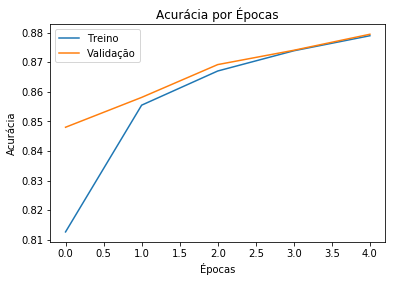

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino','Validação'])

# Gráfico do Histórico da Perda

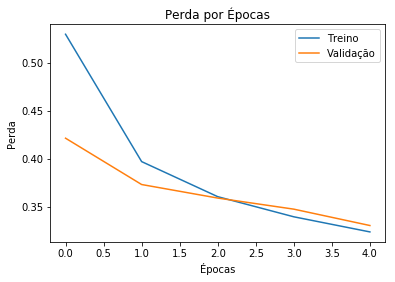

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['Treino','Validação'])

# Testando o Modelo

In [0]:
testes = modelo.predict(x_teste)
modelo.evaluate(x_teste,y_teste)


10000/10000 [==============================] - 0s 37us/sample - loss: 58.7081 - acc: 0.8475


[58.70809483823776, 0.8475]